In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [46]:
#Using appropriate library to read the CSV file
df = pd.read_csv("healthcare.csv", header=0)
print(df.head())

   id  gender   age  hypertension  heart_disease ever_married      work_type  \
0   1    Male  67.0             0              1          Yes        Private   
1   2  Female  61.0             0              0          Yes  Self-employed   
2   3    Male  80.0             0              1          Yes        Private   
3   4  Female  49.0             0              0          Yes        Private   
4   5  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  


In [47]:
#Removes rows with NaN
df = df.dropna()
#Removes duplicate rows
df = df.drop_duplicates()
#Removing negative values from the age column
df['age'] = df['age'].where(df['age']>=0)

print(df)

        id  gender   age  hypertension  heart_disease ever_married  \
0        1    Male  67.0             0              1          Yes   
2        3    Male  80.0             0              1          Yes   
3        4  Female  49.0             0              0          Yes   
4        5  Female  79.0             1              0          Yes   
5        6    Male  81.0             0              0          Yes   
...    ...     ...   ...           ...            ...          ...   
6122  6123  Female  68.0             1              1          Yes   
6123  6124    Male  57.0             0              0          Yes   
6124  6125  Female  14.0             0              0           No   
6125  6126  Female  75.0             0              0          Yes   
6127  6128  Female  78.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   

In [48]:
#Doing one-hot encoding (convert categorical value to numerical value)
df = pd.get_dummies(df, columns = ['ever_married', 'gender', 'work_type', 'Residence_type', 'smoking_status'])

print(df)

        id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0        1  67.0             0              1             228.69  36.6   
2        3  80.0             0              1             105.92  32.5   
3        4  49.0             0              0             171.23  34.4   
4        5  79.0             1              0             174.12  24.0   
5        6  81.0             0              0             186.21  29.0   
...    ...   ...           ...            ...                ...   ...   
6122  6123  68.0             1              1             247.51  40.5   
6123  6124  57.0             0              0              84.96  36.7   
6124  6125  14.0             0              0              57.93  30.9   
6125  6126  75.0             0              0              78.80  29.3   
6127  6128  78.0             0              0              78.81  19.6   

      stroke  ever_married_No  ever_married_Yes  gender_Female  ...  \
0          1                0           

In [49]:
#Setting features columns
features_df = df[['gender_Female', 'gender_Male', 'gender_Other', 'work_type_children', 'work_type_Private', 
                  'work_type_Never_worked', 'work_type_Self-employed', 
                  'work_type_Govt_job', 'Residence_type_Urban', 'Residence_type_Rural', 'smoking_status_smokes', 
                  'smoking_status_never smoked', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 
                  'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
print(features_df)

      gender_Female  gender_Male  gender_Other  work_type_children  \
0                 0            1             0                   0   
2                 0            1             0                   0   
3                 1            0             0                   0   
4                 1            0             0                   0   
5                 0            1             0                   0   
...             ...          ...           ...                 ...   
6122              1            0             0                   0   
6123              0            1             0                   0   
6124              1            0             0                   1   
6125              1            0             0                   0   
6127              1            0             0                   0   

      work_type_Private  work_type_Never_worked  work_type_Self-employed  \
0                     1                       0                        0   
2      

In [50]:
#Setting target column
target_df = df[['stroke']]
print(target_df)

      stroke
0          1
2          1
3          1
4          1
5          1
...      ...
6122       1
6123       1
6124       1
6125       1
6127       1

[5762 rows x 1 columns]


In [51]:
#Making sure theres no Null values before training
df = df.dropna()
null_counts = df.isnull().sum()
print(null_counts)

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
ever_married_No                   0
ever_married_Yes                  0
gender_Female                     0
gender_Male                       0
gender_Other                      0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


In [52]:
#Splitting training data and test data from dataset
y_values = df['stroke']
x_values = df[['gender_Female', 'gender_Male', 'gender_Other', 'work_type_children',
               'work_type_Private', 'work_type_Never_worked', 'work_type_Self-employed', 
               'work_type_Govt_job', 'Residence_type_Urban', 'Residence_type_Rural', 'smoking_status_smokes', 
               'smoking_status_never smoked', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 
               'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=100)

#Standardising the data
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [53]:
#train logistic regression model
model = LogisticRegression()
model.fit(x_train_scale, y_train)

LogisticRegression()

In [54]:
#Make predictions on testing set
y_pred = model.predict(x_test_scale)

In [55]:
#calulate accuracy and confusion matrix
accuracy = accuracy_score (y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("accuracy", accuracy)
print("Confusion matrix:\n", conf_matrix) 

accuracy 0.8353623188405798
Confusion matrix:
 [[1364   43]
 [ 241   77]]


<Axes: xlabel='Predicted', ylabel='Actual'>

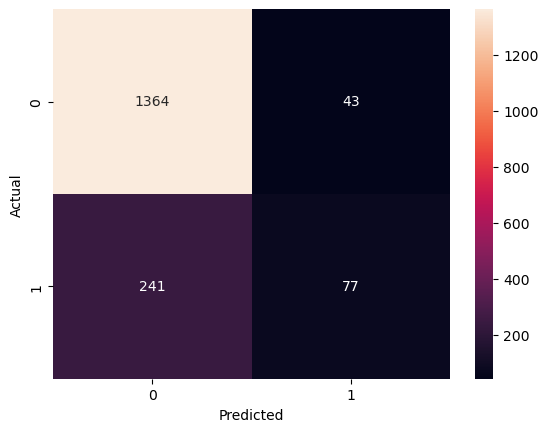

In [56]:
#Plot heatmap for the confusion matrix
df1 = pd.DataFrame()

# Create new columns within dataframe
df1['Actual'] = y_test
df1['Predicted'] = y_pred

# Use pd.crosstab to count the frequency of the classes in actual and predicted
freq = pd.crosstab(df1.Actual,df1.Predicted)

# Use sns.heatmap to plot the heatmap
sns.heatmap(freq,annot=True,fmt="d")

In [57]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [ 1, 2, 4],
}
# Create a random forest classifier
rf = RandomForestClassifier()
# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(x_train_scale, y_train)
# Get the best model and its hyperparameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
# Evaluate the best model on the testing set
y_predictions = best_rf.predict(x_test_scale)
accuracy = accuracy_score(y_test, y_predictions)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.9866666666666667


In [58]:
# Training of random forest classifier model
rf = RandomForestClassifier(max_depth=None, n_estimators=50, min_samples_leaf=1, min_samples_split=2 )
rf.fit(x_train_scale,y_train)

RandomForestClassifier(n_estimators=50)

In [59]:
#Make predictions on testing set
y_predict = rf.predict(x_test_scale)

In [60]:
#calulate accuracy and confusion matrix
accuracy = accuracy_score (y_test, y_predict)
conf_matrix = confusion_matrix(y_test, y_predict)

print("accuracy", accuracy)
print("Confusion matrix:\n", conf_matrix) 

accuracy 0.9860869565217392
Confusion matrix:
 [[1383   24]
 [   0  318]]


<Axes: xlabel='Predicted', ylabel='Actual'>

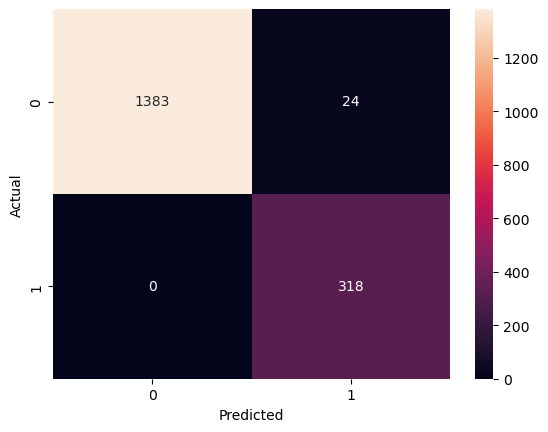

In [61]:
#Plot heatmap for the confusion matrix
df2 = pd.DataFrame()

# Create new columns within dataframe
df2['Actual'] = y_test
df2['Predicted'] = y_predict

# Use pd.crosstab to count the frequency of the classes in actual and predicted
freq = pd.crosstab(df2.Actual,df2.Predicted)

# Use sns.heatmap to plot the heatmap
sns.heatmap(freq,annot=True,fmt="d")

[0.8156521739130435, 0.8249275362318841, 0.8284057971014492, 0.8423188405797102, 0.8486956521739131, 0.8614492753623189, 0.8718840579710145, 0.8852173913043478, 0.888695652173913]


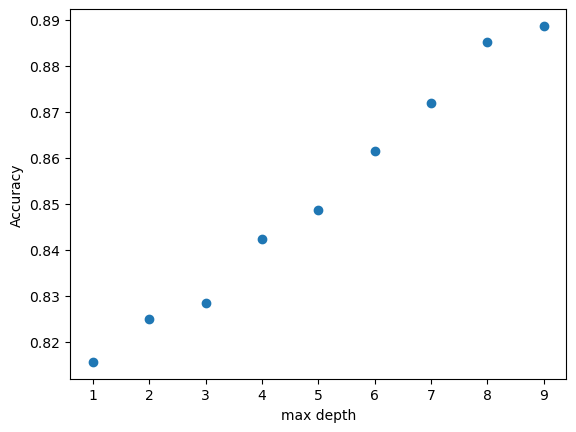

In [62]:
# Create an empty list to store the accuracy and the best tested parameter for each decision tree
accuracy = []
depth = []

# Use ii to cycle through values 1 to 9. This will be the max_depth value for the decision tree. 
for ii in range(1,10):
    # Set max_depth to ii
    dt = tree.DecisionTreeClassifier(max_depth=ii)
    # Training or fitting the model with the data
    dt.fit(x_train_scale,y_train)
    # .score provides the accuracy of the model based on the testing data. Store the accuracy into the list.
    accuracy.append(dt.score(x_test_scale,y_test))
    # Append the max_depth values to a list
    depth.append(ii)

print(accuracy)
plt.scatter(depth,accuracy)
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.show();

In [63]:
#Training decision tree model
dt = tree.DecisionTreeClassifier(max_depth=5)
dt.fit(x_train_scale,y_train)

DecisionTreeClassifier(max_depth=5)

In [64]:
#Making prediction on testing set
y_prediction = dt.predict(x_test_scale)

In [65]:
#calulate accuracy and confusion matrix
accuracy = accuracy_score (y_test, y_prediction)
conf_matrix = confusion_matrix(y_test, y_prediction)

print("accuracy", accuracy)
print("Confusion matrix:\n", conf_matrix)

accuracy 0.8486956521739131
Confusion matrix:
 [[1288  119]
 [ 142  176]]


<Axes: xlabel='Predicted', ylabel='Actual'>

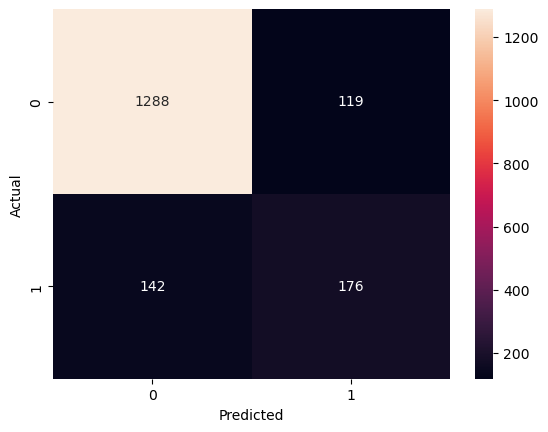

In [66]:
# Create new dataframe
df3 = pd.DataFrame()

# Create new columns within dataframe
df3['Actual'] = y_test
df3['Predicted'] = y_prediction

# Use pd.crosstab to count the frequency of the classes in actual and predicted
freq = pd.crosstab(df3.Actual,df3.Predicted)

# Use sns.heatmap to plot the heatmap
sns.heatmap(freq,annot=True,fmt="d")

[0.9588405797101449, 0.9478260869565217, 0.9118840579710145, 0.8857971014492754, 0.8579710144927536, 0.8342028985507246, 0.8168115942028985, 0.8301449275362319, 0.8278260869565217, 0.8481159420289855, 0.8486956521739131, 0.8452173913043478, 0.8486956521739131, 0.8452173913043478, 0.8446376811594203]


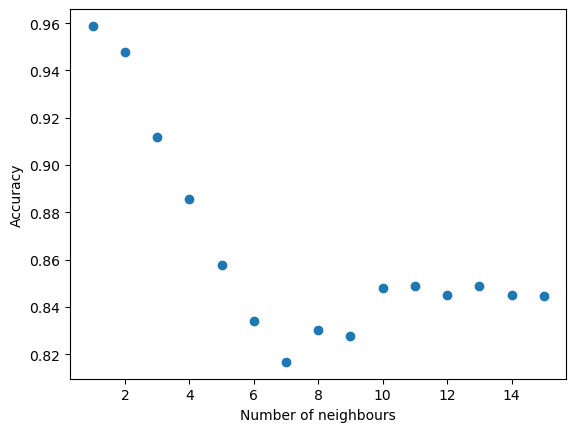

In [67]:
# Create an empty list to store the accuracy and number of neighbours for each KNN model
accuracy = []
num_neigh = []

# Use ii to cycle through values 1 to 15. This will be the number of neighbours for the KNN classifier. 
for ii in range(1,16):
    # Set number of neighbours to ii
    KNN = KNeighborsClassifier(n_neighbors=ii)
    # Training or fitting the model with the data
    KNN.fit(x_train_scale,y_train)
    # .score provides the accuracy of the model based on the testing data. Store the accuracy into the list.
    accuracy.append(KNN.score(x_test_scale,y_test))
    # Append the number of neighbours to a list
    num_neigh.append(ii)

print(accuracy)
plt.scatter(num_neigh,accuracy)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show();

In [68]:
#Training of KNN model
KNN =KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train_scale,y_train)

KNeighborsClassifier()

In [69]:
#Make predictions on testing set
y_predictions = KNN.predict(x_test_scale)

In [70]:
#calulate accuracy and confusion matrix
accuracy = accuracy_score (y_test, y_predictions)
conf_matrix = confusion_matrix(y_test, y_predictions)

print("accuracy", accuracy)
print("Confusion matrix:\n", conf_matrix) 

accuracy 0.8579710144927536
Confusion matrix:
 [[1245  162]
 [  83  235]]


<Axes: xlabel='Predicted', ylabel='Actual'>

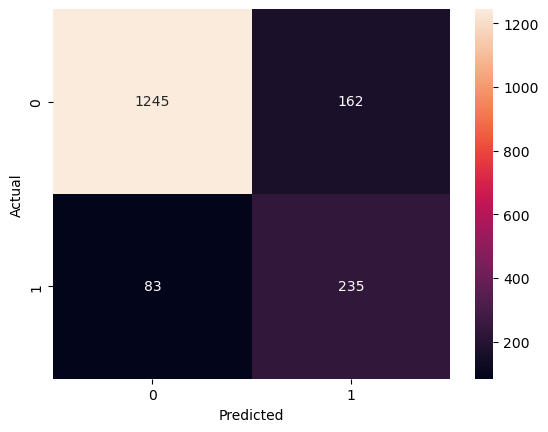

In [71]:
#Plot heatmap for the confusion matrix
df4 = pd.DataFrame()

# Create new columns within dataframe
df4['Actual'] = y_test
df4['Predicted'] = y_predictions

# Use pd.crosstab to count the frequency of the classes in actual and predicted
freq = pd.crosstab(df4.Actual,df4.Predicted)

# Use sns.heatmap to plot the heatmap
sns.heatmap(freq,annot=True,fmt="d")